## 구글 마운트 연동

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 라이브러리 설치 / 호출

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import itertools
import math
import warnings
warnings.filterwarnings('ignore')

from functools import reduce

from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from datetime import datetime
from matplotlib.patches import RegularPolygon
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm
from wordcloud import WordCloud
from PIL import Image

In [ ]:
df_demo = pd.read_pickle('df_demo.pkl')
df_buy = pd.read_pickle('df_buy.pkl')
df_product = pd.read_pickle('df_product.pkl')
df_store = pd.read_pickle('df_store.pkl')
df_affiliate = pd.read_pickle('df_affiliate.pkl')
df_lpay = pd.read_pickle('df_lpay.pkl')

In [ ]:
df_buy['buy_date'] = pd.to_datetime(df_buy['buy_date'], format='%Y%m%d')

In [ ]:
temp = pd.DataFrame(df_buy[df_buy.id == "M533286446"].groupby(['affiliate'])['buy_count'].sum()).reset_index()
temp.loc[5] = ['A05', 0]
temp

,affiliate,buy_count
0,A01,19
1,A02,60
2,A03,16
3,A04,155
4,A06,56
5,A05,0


In [ ]:
df_demo[df_demo.id == "M533286446"]

,id,gender,ages,addr_big_cat
16018,M533286446,남성,40대,Z10


([<matplotlib.patches.Wedge at 0x7f20f8b509d0>,
 [Text(1.0736068899330529, 0.23951669229571068, 'A01'),
  Text(0.5657672614554033, 0.9433490371359126, 'A02'),
  Text(-0.2615093533181411, 1.0684628482671392, 'A03'),
  Text(-1.0022180199693833, -0.4533861934914308, 'A04'),
  Text(0.9374909067737839, -0.5754222794752291, 'A06'),
  Text(1.0996716375011724, 0.026875447447262623, 'A05')])

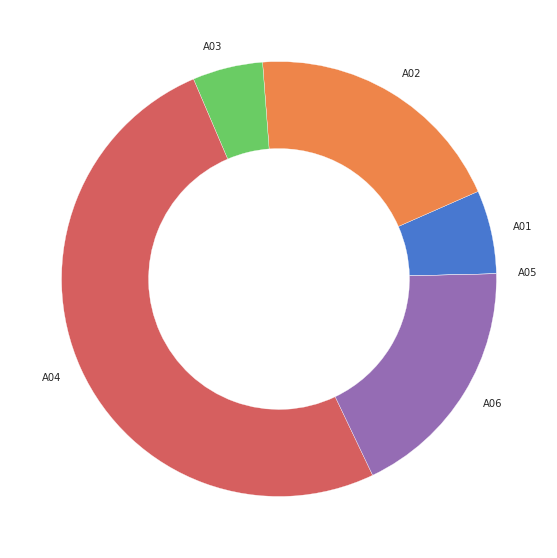

In [ ]:
group_names = temp.affiliate
group_sizes = temp.buy_count

fig = plt.figure(figsize=(10, 10))
wed={"width": 0.4}
plt.pie(group_sizes, labels=group_names, startangle=1.4, wedgeprops=wed)

# 유통사별 구매 데이터 시각화

## 제휴사 별 데이터프레임 생성

In [ ]:
df_a1 = df_buy[df_buy['affiliate'] == 'A01']   # 70만
df_a2 = df_buy[df_buy['affiliate'] == 'A02']   # 237만
df_a3 = df_buy[df_buy['affiliate'] == 'A03']   # 90만
df_a4 = df_buy[df_buy['affiliate'] == 'A04']   # 31만
df_a5 = df_buy[df_buy['affiliate'] == 'A05']   # 8000
df_a6 = df_buy[df_buy['affiliate'] == 'A06']   # 7만

df_b = df_affiliate[df_affiliate['affiliate'] == 'B01']   # 8000

df_c1 = df_affiliate[df_affiliate['affiliate'] == 'C01']   # 4만
df_c2 = df_affiliate[df_affiliate['affiliate'] == 'C02']   # 3만
   
df_d1 = df_affiliate[df_affiliate['affiliate'] == 'D01']   # 11만
df_d2 = df_affiliate[df_affiliate['affiliate'] == 'D02']   # 4만

df_e = df_affiliate[df_affiliate['affiliate'] == 'E01']   # 6000

In [ ]:
df_a1 = pd.merge(df_a1, df_demo, how = 'inner', on = 'id')
df_a2 = pd.merge(df_a2, df_demo, how = 'inner', on = 'id')
df_a3 = pd.merge(df_a3, df_demo, how = 'inner', on = 'id')
df_a4 = pd.merge(df_a4, df_demo, how = 'inner', on = 'id')
df_a5 = pd.merge(df_a5, df_demo, how = 'inner', on = 'id')
df_a6 = pd.merge(df_a6, df_demo, how = 'inner', on = 'id')

In [ ]:
df_a1

,id,basket,channel,affiliate,store_cd,product_code,buy_date,buy_time,buy_amount,buy_count,gender,ages,addr_big_cat
0,M430112881,A01000001113,1,A01,A010039,PD0290,2021-01-01,10,15000.0,1,여성,50대,Z17
1,M430112881,A01000003148,1,A01,A010039,PD0290,2021-01-01,10,19000.0,1,여성,50대,Z17
2,M430112881,A01000003148,1,A01,A010039,PD0290,2021-01-01,10,19000.0,1,여성,50대,Z17
3,M430112881,A01000004946,1,A01,A010039,PD0290,2021-01-01,10,19000.0,1,여성,50대,Z17
4,M430112881,A01000005297,1,A01,A010039,PD1692,2021-01-01,10,9900.0,1,여성,50대,Z17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700345,M315117122,A01502415022,1,A01,A010049,PD0829,2021-12-31,18,69000.0,1,여성,30대,Z11
700346,M315117122,A01502429916,1,A01,A010049,PD1081,2021-12-31,18,90300.0,1,여성,30대,Z11
700347,M891767512,A01502585501,1,A01,A010058,PD1684,2021-12-31,18,45800.0,1,남성,40대,Z10
700348,M626451429,A01502667199,1,A01,A010001,PD1896,2021-12-31,19,45000.0,1,여성,20대,Z09


In [ ]:
df_a1.gender.replace({'여성' : 'female', '남성' : 'male'}, inplace = True)
df_a2.gender.replace({'여성' : 'female', '남성' : 'male'}, inplace = True)
df_a3.gender.replace({'여성' : 'female', '남성' : 'male'}, inplace = True)
df_a4.gender.replace({'여성' : 'female', '남성' : 'male'}, inplace = True)
df_a5.gender.replace({'여성' : 'female', '남성' : 'male'}, inplace = True)
df_a6.gender.replace({'여성' : 'female', '남성' : 'male'}, inplace = True)

df_a1.ages.replace({'20대' : '20', '30대' : '30', '40대' : '40', '50대' : '50','60대' : '60', '70대' : '70'}, inplace = True)
df_a2.ages.replace({'20대' : '20', '30대' : '30', '40대' : '40', '50대' : '50','60대' : '60', '70대' : '70'}, inplace = True)
df_a3.ages.replace({'20대' : '20', '30대' : '30', '40대' : '40', '50대' : '50','60대' : '60', '70대' : '70'}, inplace = True)
df_a4.ages.replace({'20대' : '20', '30대' : '30', '40대' : '40', '50대' : '50','60대' : '60', '70대' : '70'}, inplace = True)
df_a5.ages.replace({'20대' : '20', '30대' : '30', '40대' : '40', '50대' : '50','60대' : '60', '70대' : '70'}, inplace = True)
df_a6.ages.replace({'20대' : '20', '30대' : '30', '40대' : '40', '50대' : '50','60대' : '60', '70대' : '70'}, inplace = True)

## 시각화

### A01

- 성별, 연령대 별로 나눠서 시각화할 예정(시계열 추세 그래프 비교)
- 상품 valuecounts() 바탕으로 워드클라우드

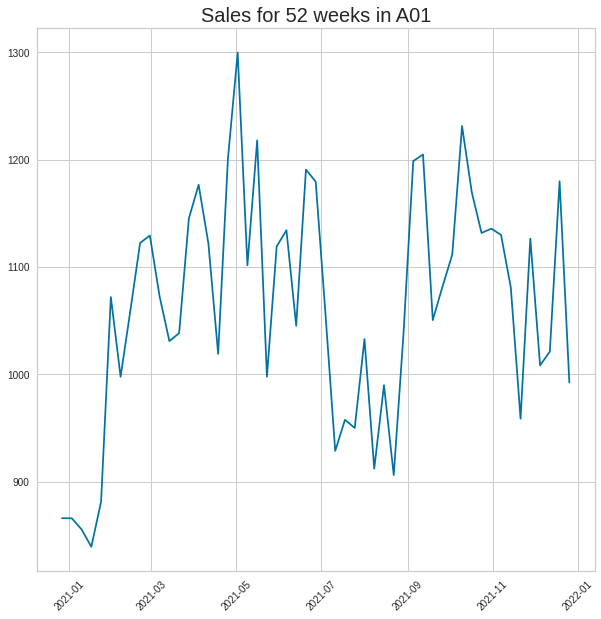

In [ ]:
# A01
df_a1_cnt_sum = df_a1.groupby(['buy_date', 'gender'])['buy_count'].sum().reset_index()

w_df_a1_cnt_sum = df_a1_cnt_sum.set_index('buy_date').resample('W', label = 'left').mean().reset_index()

fig = plt.figure(figsize=(10,10)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
 
sns.set_palette('muted')
sns.barplot(x='ages', y='buy_count', hue='gender', data=df_a1_cnt_sum1)
 
plt.xticks(rotation=45) ## x축 눈금 라벨 설정 - 40도 회전 
plt.title('Sales for 52 weeks in A01',fontsize=20) ## 타이틀 설정
plt.show()

In [ ]:
df_a1_prod = pd.DataFrame(pd.merge(df_a1, df_product, how = 'left', on = 'product_code')['product_name'].value_counts()).reset_index()
df_a1_prod

,index,product_name
0,기타남성의류세트,34309
1,임대매출,34201
2,디저트,21281
3,푸드코트한식,17845
4,한식,17222
...,...,...
1460,얼음,1
1461,여아한복,1
1462,뚜껑형김치냉장고,1
1463,유아동의자,1


In [ ]:
im = Image.open('/content/drive/Shareddrives/롯데멤버스 빅데이터 경진대회/data/circle.png') # 이미지 파일 읽어오기
mask_arr = np.array(im) 

wordcloud = WordCloud(background_color ='white', 
                      colormap='autumn',
                      mask = mask_arr,
                      font_path = 'NanumGothic',
                      width = 1000,
                      height = 1000)

text = " ".join(df_a1_prod["index"])

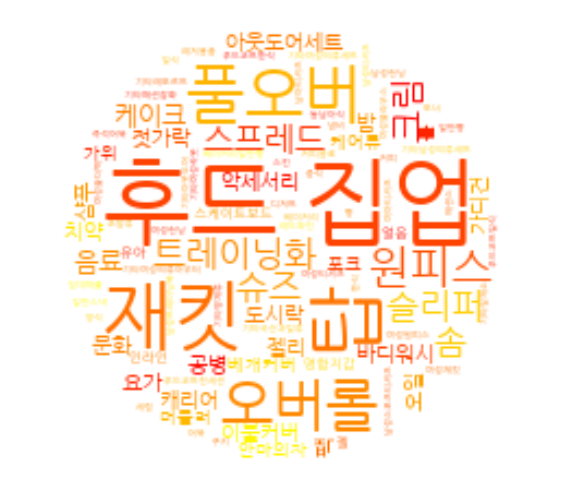

In [ ]:
index = wordcloud.generate(text)

array = index.to_array()

plt.figure(figsize = (10,10))
plt.imshow(array,
           interpolation="bilinear")

plt.axis("off")
plt.show()

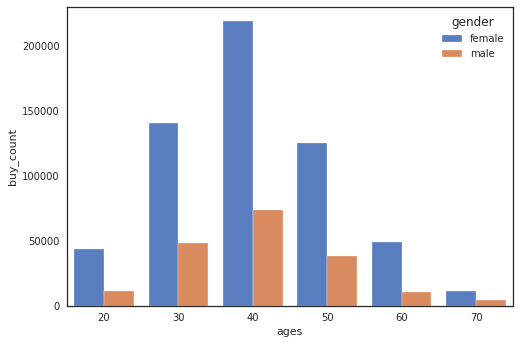

In [ ]:
sns.set_style("ticks")
df_a1_cnt_sum1 = df_a1.groupby(['gender', 'ages'])['buy_count'].sum().reset_index()
sns.set_palette('muted')
sns.barplot(x='ages', y='buy_count', hue='gender', data=df_a1_cnt_sum1)

### A02

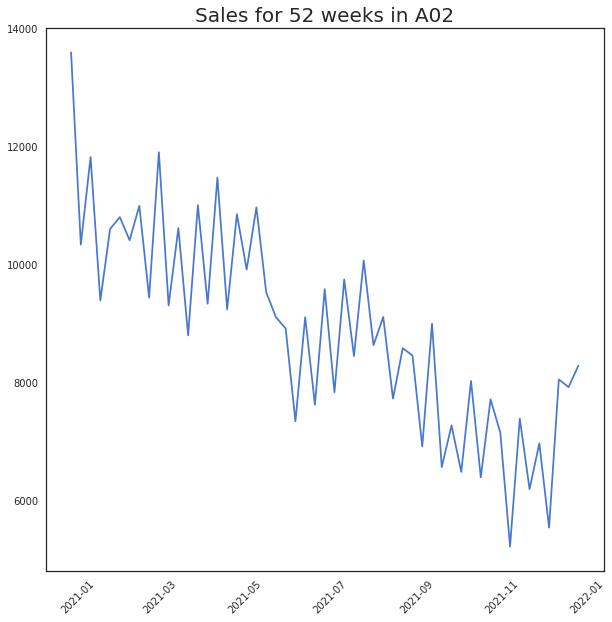

In [ ]:
# A02
df_a2_cnt_sum = df_a2.groupby('buy_date')['buy_count'].sum().reset_index()

w_df_a2_cnt_sum = df_a2_cnt_sum.set_index('buy_date').resample('W', label = 'left').mean().reset_index()

fig = plt.figure(figsize=(10,10)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
 
ax.plot(w_df_a2_cnt_sum['buy_date'],w_df_a2_cnt_sum['buy_count']) ## 선그래프 생성

 
plt.xticks(rotation=45) ## x축 눈금 라벨 설정 - 40도 회전 
plt.title('Sales for 52 weeks in A02',fontsize=20) ## 타이틀 설정
plt.show()

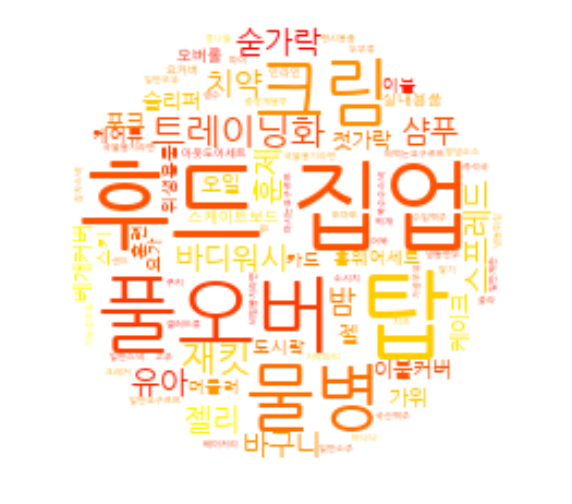

In [ ]:
df_a2_prod = pd.DataFrame(pd.merge(df_a2, df_product, how = 'left', on = 'product_code')['product_name'].value_counts()).reset_index()

im = Image.open('/content/drive/Shareddrives/롯데멤버스 빅데이터 경진대회/data/circle.png') # 이미지 파일 읽어오기
mask_arr = np.array(im) 

wordcloud = WordCloud(background_color ='white', 
                      colormap='autumn',
                      mask = mask_arr,
                      font_path = 'NanumGothic',
                      width = 800,
                      height = 800)

text = " ".join(df_a2_prod["index"])

index = wordcloud.generate(text)

array = index.to_array()

plt.figure(figsize = (10,10))
plt.imshow(array,
           interpolation="bilinear")

plt.axis("off")
plt.show()

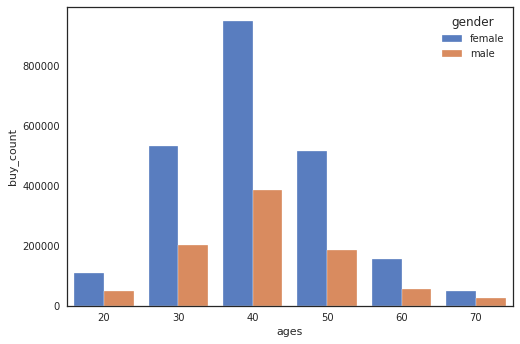

In [ ]:
df_a2_cnt_sum2 = df_a2.groupby(['gender', 'ages'])['buy_count'].sum().reset_index()
sns.set_palette('muted')
sns.barplot(x='ages', y='buy_count', hue='gender', data=df_a2_cnt_sum2)

### A03

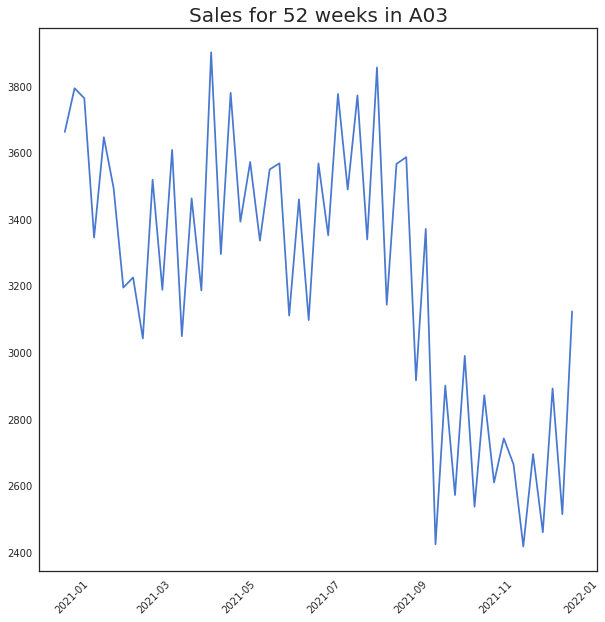

In [ ]:
# A03
df_a3_cnt_sum = df_a3.groupby('buy_date')['buy_count'].sum().reset_index()

w_df_a3_cnt_sum = df_a3_cnt_sum.set_index('buy_date').resample('W', label = 'left').mean().reset_index()

fig = plt.figure(figsize=(10,10)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
 
ax.plot(w_df_a3_cnt_sum['buy_date'],w_df_a3_cnt_sum['buy_count']) ## 선그래프 생성

 
plt.xticks(rotation=45) ## x축 눈금 라벨 설정 - 40도 회전 
plt.title('Sales for 52 weeks in A03',fontsize=20) ## 타이틀 설정
plt.show()

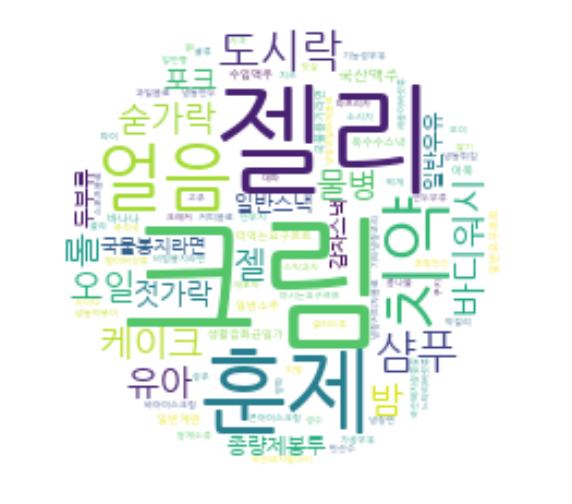

In [ ]:
df_a3_prod = pd.DataFrame(pd.merge(df_a3, df_product, how = 'left', on = 'product_code')['product_name'].value_counts()).reset_index()


im = Image.open('/content/drive/Shareddrives/롯데멤버스 빅데이터 경진대회/data/circle.png') # 이미지 파일 읽어오기
mask_arr = np.array(im) 

wordcloud = WordCloud(background_color ='white', 
                      #colormap='autumn',
                      mask = mask_arr,
                      font_path = 'NanumGothic',
                      width = 1000,
                      height = 1000)

text = " ".join(df_a3_prod["index"])

index = wordcloud.generate(text)

array = index.to_array()

plt.figure(figsize = (10,10))
plt.imshow(array,
           interpolation="bilinear")

plt.axis("off")
plt.show()

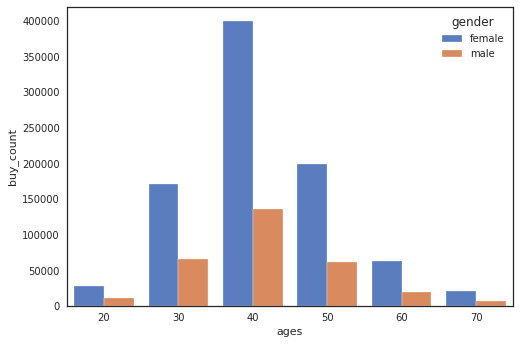

In [ ]:
df_a3_cnt_sum2 = df_a3.groupby(['gender', 'ages'])['buy_count'].sum().reset_index()
sns.set_palette('muted')
sns.barplot(x='ages', y='buy_count', hue='gender', data=df_a3_cnt_sum2)

### A04

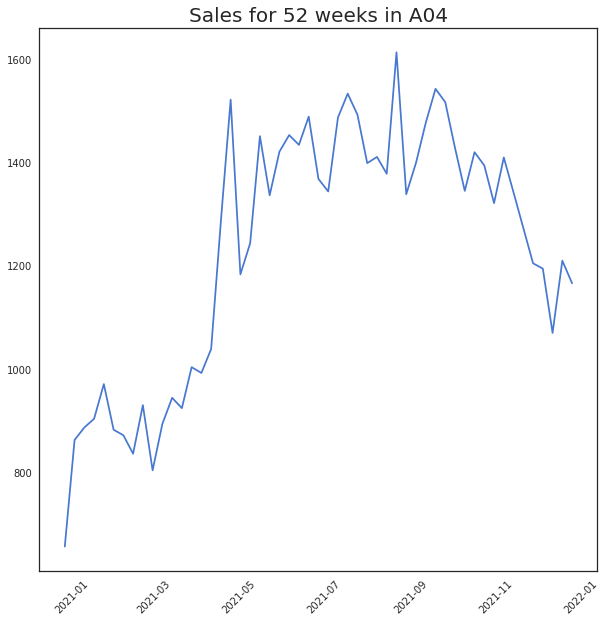

In [ ]:
# A04
df_a4_cnt_sum = df_a4.groupby('buy_date')['buy_count'].sum().reset_index()

w_df_a4_cnt_sum = df_a4_cnt_sum.set_index('buy_date').resample('W', label = 'left').mean().reset_index()

fig = plt.figure(figsize=(10,10)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
 
ax.plot(w_df_a4_cnt_sum['buy_date'],w_df_a4_cnt_sum['buy_count']) ## 선그래프 생성

 
plt.xticks(rotation=45) ## x축 눈금 라벨 설정 - 40도 회전 
plt.title('Sales for 52 weeks in A04',fontsize=20) ## 타이틀 설정
plt.show()

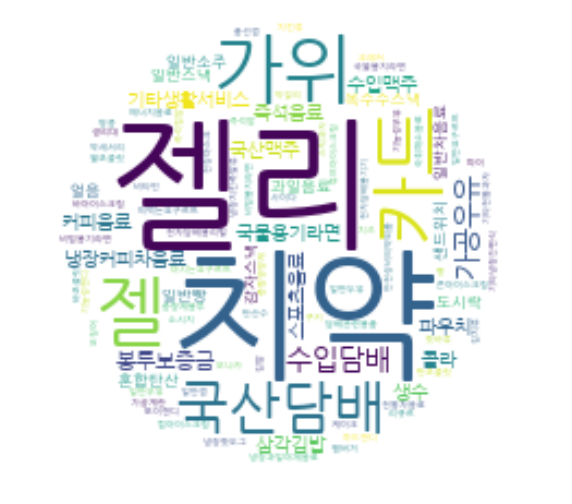

In [ ]:
df_a4_prod = pd.DataFrame(pd.merge(df_a4, df_product, how = 'left', on = 'product_code')['product_name'].value_counts()).reset_index()

im = Image.open('/content/drive/Shareddrives/롯데멤버스 빅데이터 경진대회/data/circle.png') # 이미지 파일 읽어오기
mask_arr = np.array(im) 

wordcloud = WordCloud(background_color ='white', 
                      #colormap='autumn',
                      mask = mask_arr,
                      font_path = 'NanumGothic',
                      width = 800,
                      height = 800)

text = " ".join(df_a4_prod["index"])

index = wordcloud.generate(text)

array = index.to_array()

plt.figure(figsize = (10,10))
plt.imshow(array,
           interpolation="bilinear")

plt.axis("off")
plt.show()

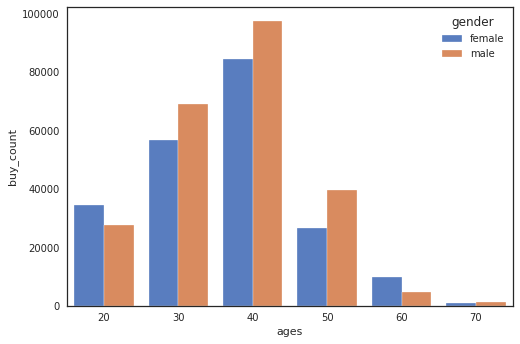

In [ ]:
df_a4_cnt_sum2 = df_a4.groupby(['gender', 'ages'])['buy_count'].sum().reset_index()
sns.set_palette('muted')
sns.barplot(x='ages', y='buy_count', hue='gender', data=df_a4_cnt_sum2)

### A05

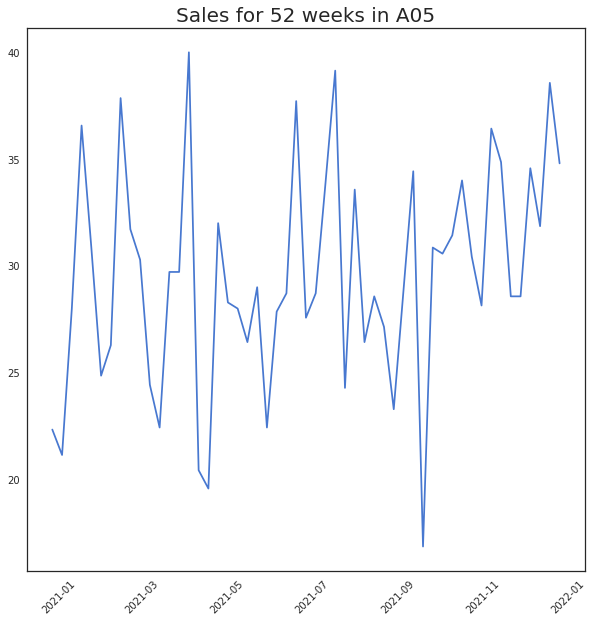

In [ ]:
# A05
df_a5_cnt_sum = df_a5.groupby('buy_date')['buy_count'].sum().reset_index()

w_df_a5_cnt_sum = df_a5_cnt_sum.set_index('buy_date').resample('W', label = 'left').mean().reset_index()

fig = plt.figure(figsize=(10,10)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
 
ax.plot(w_df_a5_cnt_sum['buy_date'],w_df_a5_cnt_sum['buy_count']) ## 선그래프 생성

 
plt.xticks(rotation=45) ## x축 눈금 라벨 설정 - 40도 회전 
plt.title('Sales for 52 weeks in A05',fontsize=20) ## 타이틀 설정
plt.show()

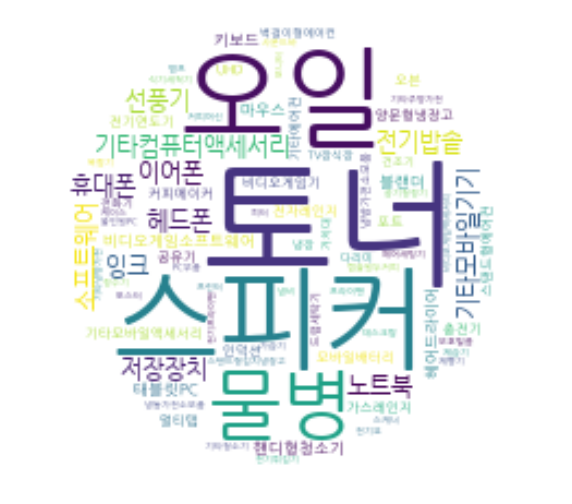

In [ ]:
df_a5_prod = pd.DataFrame(pd.merge(df_a5, df_product, how = 'left', on = 'product_code')['product_name'].value_counts()).reset_index()

im = Image.open('/content/drive/Shareddrives/롯데멤버스 빅데이터 경진대회/data/circle.png') # 이미지 파일 읽어오기
mask_arr = np.array(im) 

wordcloud = WordCloud(background_color ='white', 
                      #colormap='autumn',
                      mask = mask_arr,font_path = 'NanumGothic',
                      width = 800,
                      height = 800)

text = " ".join(df_a5_prod["index"])

index = wordcloud.generate(text)

array = index.to_array()

plt.figure(figsize = (10,10))
plt.imshow(array,
           interpolation="bilinear")

plt.axis("off")
plt.show()

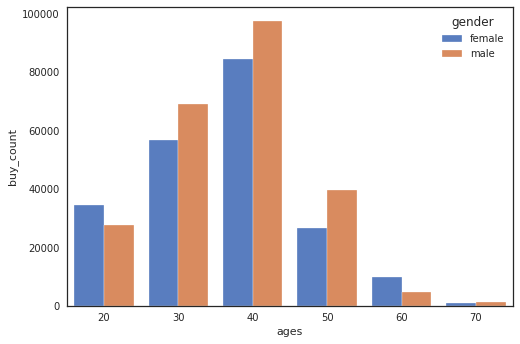

In [ ]:
df_a5_cnt_sum2 = df_a4.groupby(['gender', 'ages'])['buy_count'].sum().reset_index()
sns.set_palette('muted')
sns.barplot(x='ages', y='buy_count', hue='gender', data=df_a5_cnt_sum2)

### A06

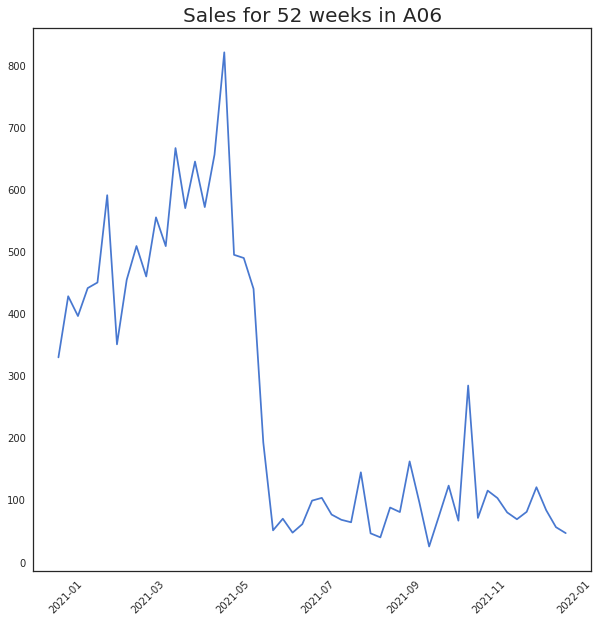

In [ ]:
# A06
df_a6_cnt_sum = df_a6.groupby('buy_date')['buy_count'].sum().reset_index()

w_df_a6_cnt_sum = df_a6_cnt_sum.set_index('buy_date').resample('W', label = 'left').mean().reset_index()

fig = plt.figure(figsize=(10,10)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
 
ax.plot(w_df_a6_cnt_sum['buy_date'],w_df_a6_cnt_sum['buy_count']) ## 선그래프 생성

 
plt.xticks(rotation=45) ## x축 눈금 라벨 설정 - 40도 회전 
plt.title('Sales for 52 weeks in A06',fontsize=20) ## 타이틀 설정
plt.show()

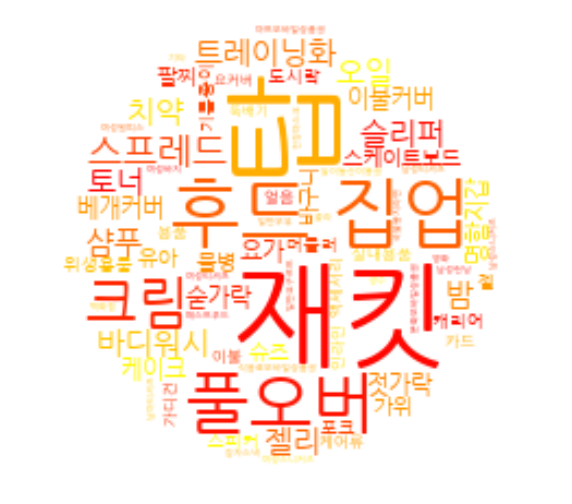

In [ ]:
df_a6_prod = pd.DataFrame(pd.merge(df_a6, df_product, how = 'left', on = 'product_code')['product_name'].value_counts()).reset_index()


im = Image.open('/content/drive/Shareddrives/롯데멤버스 빅데이터 경진대회/data/circle.png') # 이미지 파일 읽어오기
mask_arr = np.array(im) 

wordcloud = WordCloud(background_color ='white', 
                      colormap='autumn',
                      mask = mask_arr,
                      font_path = 'NanumGothic',
                      width = 800,
                      height = 800)

text = " ".join(df_a6_prod["index"])

index = wordcloud.generate(text)

array = index.to_array()

plt.figure(figsize = (10,10))
plt.imshow(array,
           interpolation="bilinear")

plt.axis("off")
plt.show()

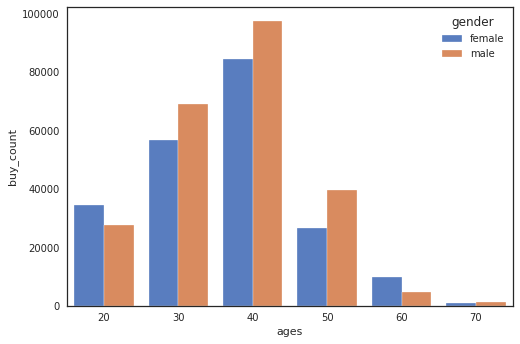

In [ ]:
df_a6_cnt_sum2 = df_a4.groupby(['gender', 'ages'])['buy_count'].sum().reset_index()
sns.set_palette('muted')
sns.barplot(x='ages', y='buy_count', hue='gender', data=df_a6_cnt_sum2)

# 엘페이 데이터 시각화 및 비교


## A01 ~ A06까지 df_buy 데이터와 df_lpay 데이터 비교

In [ ]:
buy_affiliate_channel = df_buy['channel'].groupby(df_buy['affiliate']).mean()-1
buy_affiliate_amount = df_buy['buy_amount'].groupby(df_buy['affiliate']).mean()
buy_affiliate_count = df_buy['buy_count'].groupby(df_buy['affiliate']).size()


lpay_channel = df_lpay['channel'].groupby(df_lpay['affiliate']).mean()-1
lpay_amount = df_lpay['point_amount'].groupby(df_lpay['affiliate']).mean()
lpay_count = df_lpay['point_time'].groupby(df_lpay['affiliate']).size()

lpay_channel = lpay_channel[:6]
lpay_amount = round(lpay_amount[:6])
lpay_count = lpay_count[:6]

df_channel = pd.DataFrame([buy_affiliate_channel, lpay_channel,
                           round(buy_affiliate_amount), lpay_amount,
                           buy_affiliate_count, lpay_count]).T
df_channel.columns = ['buy_channel', 'lpay_channel', 'buy_amount', 'lpay_amount', 'buy_count', 'lpay_count']
df_channel

,buy_channel,lpay_channel,buy_amount,lpay_amount,buy_count,lpay_count
affiliate,,,,,,
A01,0.008916,0.001481,105998.0,125964.0,700350.0,54026.0
A02,0.096877,0.009315,6838.0,37216.0,2374970.0,31778.0
A03,0.126841,0.003945,4091.0,16980.0,905691.0,16477.0
A04,0.000000,0.005129,3297.0,6966.0,316401.0,29243.0
A05,0.139151,0.720814,328609.0,388569.0,8171.0,2604.0
A06,1.000000,1.000000,49922.0,57285.0,76160.0,93869.0


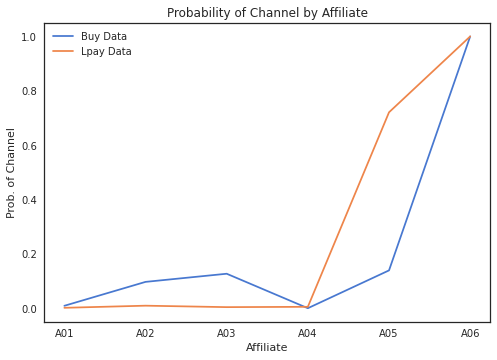

In [ ]:
plt.plot(df_channel['buy_channel']) 
plt.plot(df_channel['lpay_channel'])
plt.xlabel('Affiliate')
plt.ylabel('Prob. of Channel')
plt.title('Probability of Channel by Affiliate')
plt.legend(['Buy Data', 'Lpay Data'])
plt.show()

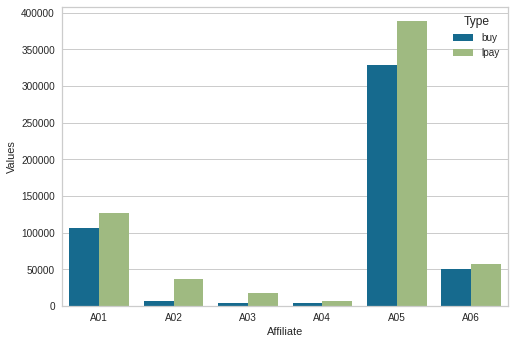

In [ ]:
values = list(buy_affiliate_amount)+ list(lpay_amount)
text = ['buy']*6 + ['lpay']*6
Affiliate = ['A01', 'A02', 'A03', 'A04', 'A05', 'A06']*2
df_long = pd.DataFrame([values, text, Affiliate]).T
df_long.columns = ['Values', 'Type', 'Affiliate']

sns.barplot(x='Affiliate', y='Values', hue='Type', data=df_long)

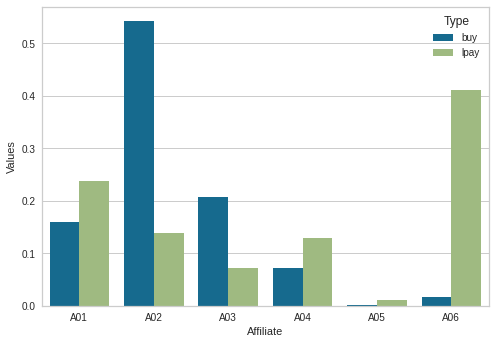

In [ ]:
values = list(buy_affiliate_count/sum(buy_affiliate_count))+ list(lpay_count/sum(lpay_count))
text = ['buy']*6 + ['lpay']*6
Affiliate = ['A01', 'A02', 'A03', 'A04', 'A05', 'A06']*2
df_long = pd.DataFrame([values, text, Affiliate]).T
df_long.columns = ['Values', 'Type', 'Affiliate']

sns.barplot(x='Affiliate', y='Values', hue='Type', data=df_long)

## B01 ~ E01까지 df_affiliate 데이터와 df_lpay 데이터 비교

In [ ]:
lpay_channel = df_lpay['channel'].groupby(df_lpay['affiliate']).mean()-1
lpay_amount = df_lpay['point_amount'].groupby(df_lpay['affiliate']).mean()
lpay_count = df_lpay['point_time'].groupby(df_lpay['affiliate']).size()

lpay_channel = lpay_channel[6:]
lpay_amount = lpay_amount[6:]
lpay_count = lpay_count[6:]

buy_channel = df_affiliate['channel'].groupby(df_affiliate['affiliate']).mean()-1
buy_amount = df_affiliate['use_amount'].groupby(df_affiliate['affiliate']).mean()
buy_count = df_affiliate['id'].groupby(df_affiliate['affiliate']).size()

df_channel2 = pd.DataFrame([buy_channel, lpay_channel,
                           round(buy_amount), round(lpay_amount),
                           buy_count, lpay_count]).T


df_channel2.columns = ['buy_channel', 'lpay_channel', 'buy_amount', 'lpay_amount', 'buy_count', 'lpay_count']
df_channel2

,buy_channel,lpay_channel,buy_amount,lpay_amount,buy_count,lpay_count
affiliate,,,,,,
B01,0.000000,0.013004,246360.0,137167.0,8103.0,769.0
C01,0.690044,0.908577,11562.0,11849.0,48323.0,11321.0
C02,0.011732,0.212272,20907.0,21126.0,30258.0,1809.0
D01,0.009124,0.533394,10295.0,10808.0,112232.0,13101.0
D02,0.000000,0.000000,10130.0,8819.0,43134.0,4250.0
E01,0.008794,0.976695,34952.0,244771.0,6254.0,472.0
L00,NaN,0.841295,NaN,60792.0,NaN,22526.0
L01,NaN,0.983338,NaN,65906.0,NaN,70939.0


In [ ]:
df_channel = df_channel2.iloc[:6,:]

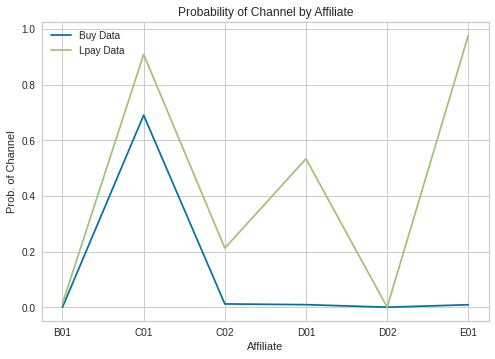

In [ ]:
plt.plot(df_channel['buy_channel']) 
plt.plot(df_channel['lpay_channel'])
plt.xlabel('Affiliate')
plt.ylabel('Prob. of Channel')
plt.title('Probability of Channel by Affiliate')
plt.legend(['Buy Data', 'Lpay Data'])
plt.show()

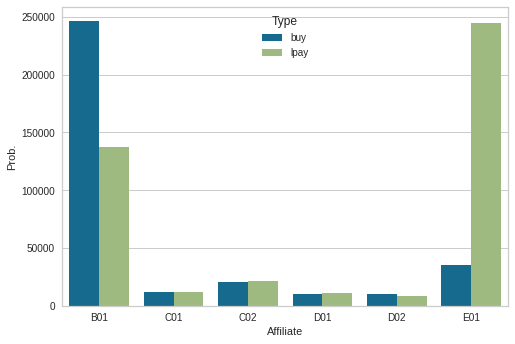

In [ ]:
values = list(buy_amount)+ list(lpay_amount[:6])
text = ['buy']*6 + ['lpay']*6
Affiliate = ['B01', 'C01', 'C02', 'D01', 'D02', 'E01']*2
df_long = pd.DataFrame([values, text, Affiliate]).T
df_long.columns = ['Prob.', 'Type', 'Affiliate']

sns.barplot(x='Affiliate', y='Prob.', hue='Type', data=df_long)

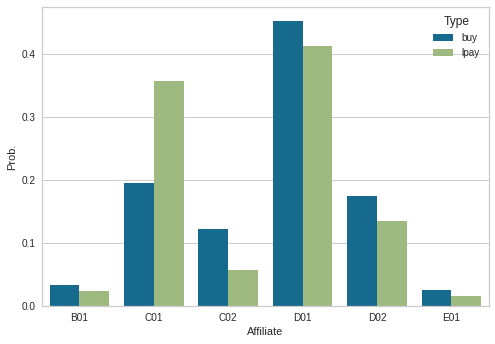

In [ ]:
values = list(buy_count/sum(buy_count))+ list(lpay_count[:6]/sum(lpay_count[:6]))
text = ['buy']*6 + ['lpay']*6
Affiliate = ['B01', 'C01', 'C02', 'D01', 'D02', 'E01']*2
df_long = pd.DataFrame([values, text, Affiliate]).T
df_long.columns = ['Prob.', 'Type', 'Affiliate']

sns.barplot(x='Affiliate', y='Prob.', hue='Type', data=df_long)

## 연령대/성별 별 막대그래프

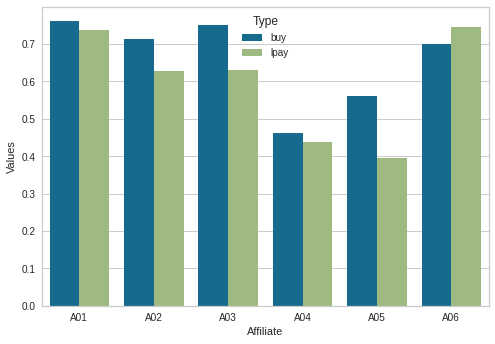

In [ ]:
demo_lpay = pd.merge(df_lpay, df_demo)
demo_lpay = demo_lpay['gender'].groupby([demo_lpay['affiliate'], demo_lpay['gender']]).size().unstack().iloc[0:6,:]

demo_buy = pd.merge(df_buy, df_demo)
demo_buy = demo_buy['gender'].groupby([demo_buy['affiliate'], demo_buy['gender']]).size().unstack()

values = list(demo_buy.여성/demo_buy.sum(axis = 1))+ list(demo_lpay.여성/demo_lpay.sum(axis = 1))
text = ['buy']*6 + ['lpay']*6
Affiliate = ['A01', 'A02', 'A03', 'A04', 'A05', 'A06']*2
df_long = pd.DataFrame([values, text, Affiliate]).T
df_long.columns = ['Values', 'Type', 'Affiliate']

sns.barplot(x='Affiliate', y='Values', hue='Type', data=df_long)

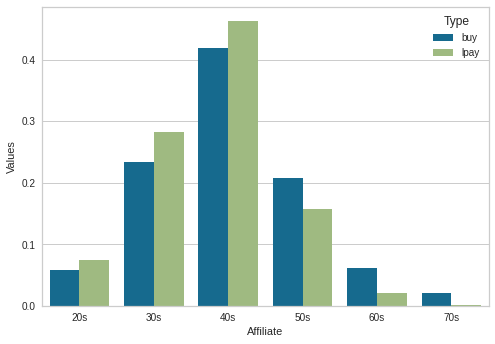

In [ ]:
demo_lpay = pd.merge(df_lpay, df_demo)
demo_lpay = demo_lpay.groupby(demo_lpay['ages']).size()

demo_buy = pd.merge(df_buy, df_demo)
demo_buy = demo_buy.groupby(demo_buy['ages']).size()

values = list(demo_buy/sum(demo_buy))+ list(demo_lpay/sum(demo_lpay))
text = ['buy']*6 + ['lpay']*6
Affiliate = ['20s', '30s', '40s', '50s', '60s', '70s']*2
df_long = pd.DataFrame([values, text, Affiliate]).T
df_long.columns = ['Values', 'Type', 'Affiliate']

sns.barplot(x='Affiliate', y='Values', hue='Type', data=df_long)

In [ ]:
temp = pd.merge(df_buy, df_lpay, how='left', on='id')
temp

NameError: ignored